# Cross Validation

## Import § Data 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_excel('/Users/lardof/Machine Learning/diyabet.xlsx')


In [7]:
df.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

In [8]:
df.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

In [9]:
df.isna().sum()
#Eksik veri var mı yok mu kontrol etmek için.

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

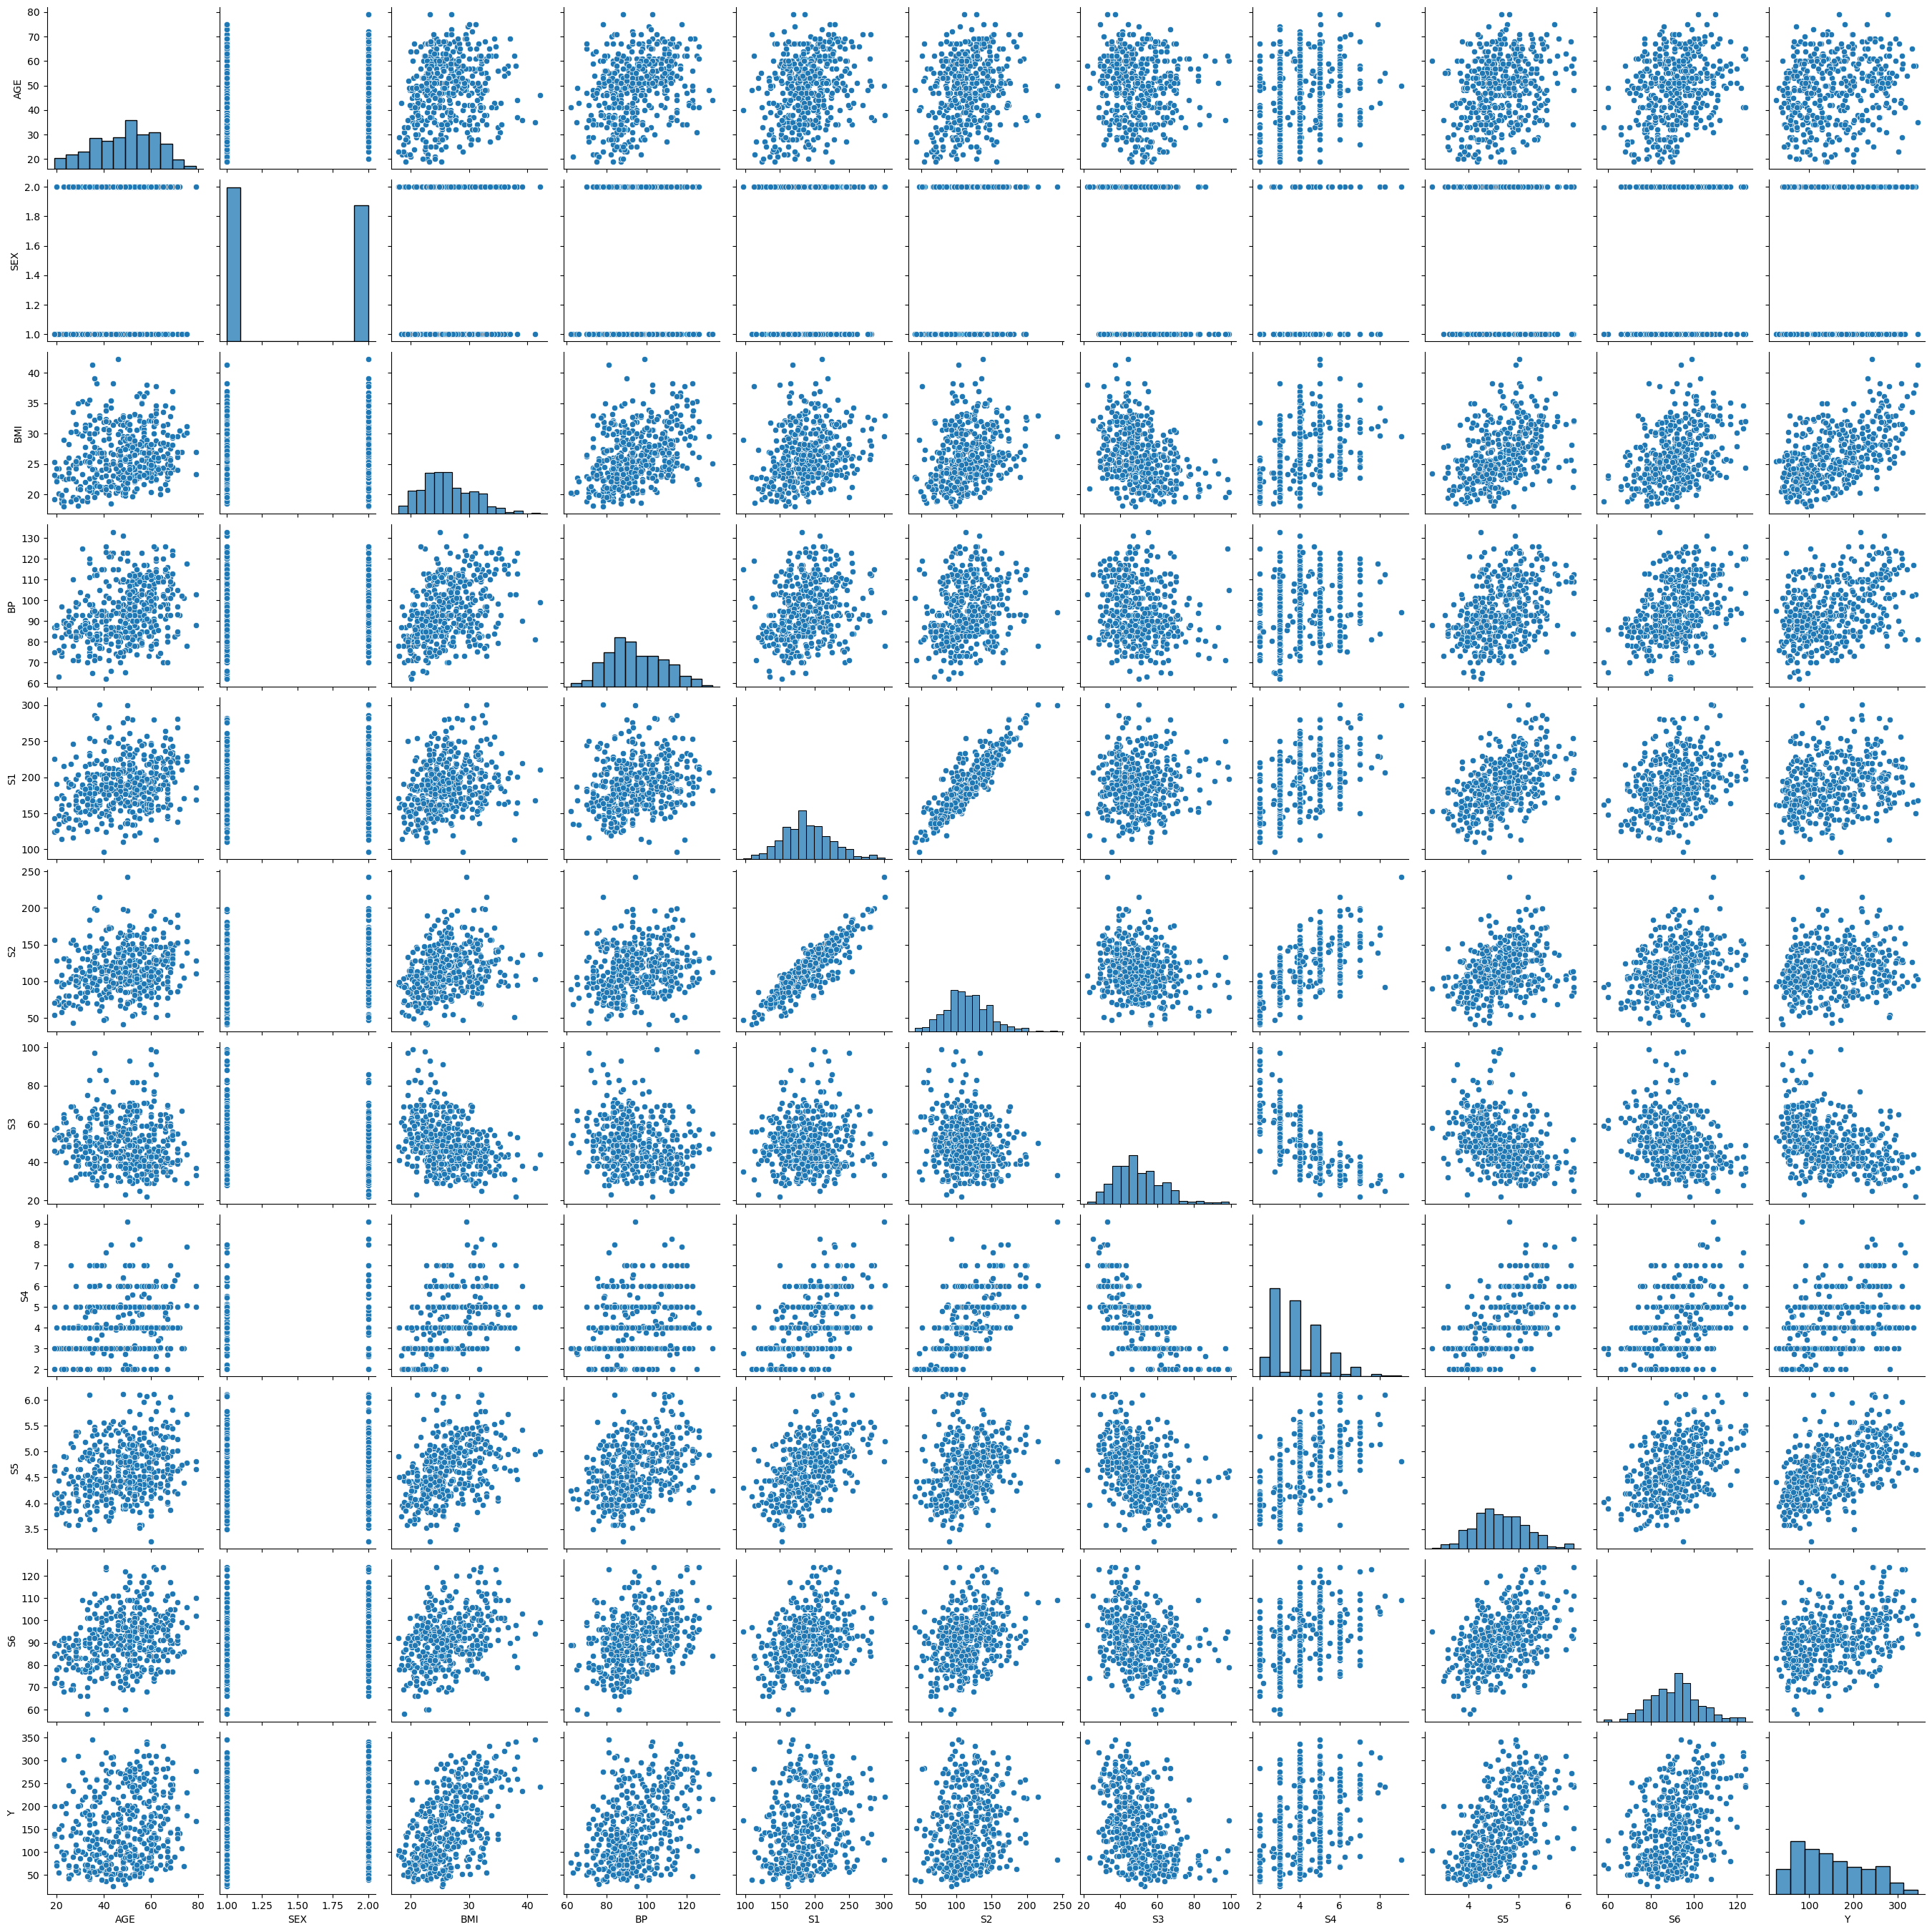

In [7]:
sns.pairplot(df);

In [10]:
df.corr()

AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.301731  0.187889  
SEX  0.332115  0.149916  0.208133  0.043062  
BMI  0.413807  0.446157  0.388680  0.586450  
BP   0.257650  0.393480  0.390430  0.441482  
S1   0.542207  0.515503  0.325717  0.212022  
S2   0.659817  0.318357  0.290600  0.174054  
S3  -0.738493 -0.398577 -0.273697 -0.394789  
S4   1.000000  0.617859  0.417212  0.430453  
S5   0.617859  1.000000  0.464669  0.565883  
S6   0.417212  0.464669  1.000000  0.382483  
Y    0.430453  0.565883  0.382483  1.000000

# Özet

#### Ne Yaptık
1. Verileri düzenle ve kontrol et.
2. EDA (Keşifçi veri analizi uygulayarak veriyi anlamaya çalış.)
3. x ve y verileri ata.
4. Verileri ölçekle.
5. Train test split ve model oluşturma.
6. Modele x_train ekle.(fit_transform)
7. .predict() modeli tahminle.
8. Hata metrikleri ile kontrolleri yap.
9. Paramaetreleri düzenle ve 5 ve 6. adımı tekrarla



## Train Test Split

In [11]:
df.drop('Y', axis=1, inplace=True)

In [12]:
df.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80

In [13]:
X = df.drop('S6', axis=1)
y = df['S6']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)


## Model Oluşturma

In [18]:
from sklearn.linear_model import Ridge

In [19]:
model = Ridge(alpha=1)

In [20]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.6715275905443

In [24]:
df['S6'].mean(), df['S6'].std()

(91.26018099547511, 11.496334739334165)

## Parametlerei Düzenle

In [50]:
model = Ridge(alpha=103)

In [51]:
model.fit(X_train, y_train)

Ridge(alpha=103)

In [52]:
y_pred = model.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

405.40315510542945

In [29]:
len(y_test)

133

In [30]:
len(y_pred)

133

In [31]:
df.shape

(442, 10)

In [32]:
X_train.shape

(309, 9)

## Train Test Validation

In [33]:
x_train , X_tv, y_train, y_tv = train_test_split (X,y ,test_size=0.3, random_state=9)

In [34]:
X_eval, X_test, y_eval, y_test = train_test_split(X_tv, y_tv, test_size = 0.5, random_state=9)

In [42]:
X_train.shape

(309, 9)

In [43]:
X_eval.shape

(66, 9)

In [44]:
X_test.shape

(67, 9)

In [45]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [48]:
model = Ridge(alpha=103)
model.fit(X_train,y_train)
y_eval_pred = model.predict(X_eval)

In [49]:
np.sqrt(mean_squared_error(y_eval, y_eval_pred))

394.06391762569007

In [59]:
y_final = model.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test, y_final))

405.40315510542945

## Cross Validation

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [63]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
model = Ridge(alpha = 103)

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
score = cross_val_score(model,X_train, y_train,
        scoring='neg_mean_squared_error',  cv=6 )


In [67]:
score

array([ -56.26312593,  -84.9389757 ,  -83.43470906, -123.84601382,
        -92.87053721, -128.52690068])

In [68]:
np.sqrt(abs(score.mean()))

9.745770556112978